In [1]:
import pandas as pd

In [2]:
bank_data = pd.read_csv("bank-full.csv", sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
print(bank_data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [4]:
bank_data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [5]:
binary_features = ['default', 'housing', 'loan', 'y']
for feature in binary_features:
    bank_data[feature] = bank_data[feature].map({'yes': 1, 'no': 0})

In [6]:
bank_data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21183,48,services,married,secondary,0,125,0,0,cellular,14,aug,89,7,-1,0,unknown,0
22023,31,management,single,tertiary,0,2085,1,0,cellular,20,aug,147,4,-1,0,unknown,0
35229,39,blue-collar,married,secondary,0,-219,1,0,cellular,7,may,101,1,-1,0,unknown,0
8952,38,technician,married,secondary,0,625,1,0,unknown,4,jun,140,2,-1,0,unknown,0
29108,46,management,married,tertiary,0,587,0,0,telephone,2,feb,186,1,-1,0,unknown,0


In [7]:
for feature in ['job', 'education', 'marital', 'contact', 'poutcome']:
    mode = bank_data[feature].mode()[0]
    bank_data[feature] = bank_data[feature].replace('unknown', mode)


In [8]:
bank_data['contact'] = bank_data['contact'].map({'cellular': 1, 'telephone': 0})

In [9]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
bank_data['month'] = bank_data['month'].map(month_mapping)


In [10]:
job_mapping = {
    'management': 1, 'technician': 2, 'entrepreneur':3, 
    'blue-collar': 4, 'retired': 5, 'admin.': 6,
    'services': 7, 'self-employed': 8, 'unemployed': 9,
    'housemaid': 10, 'student': 11
}
bank_data['job'] = bank_data['job'].map(job_mapping)

In [11]:
multi_class_features = ['marital', 'education', 'poutcome']
bank_data = pd.get_dummies(bank_data, columns=multi_class_features, drop_first=True)

In [12]:
bank_data = bank_data.astype(int)

In [13]:
X = bank_data.drop(columns="y")
y = bank_data['y']
X

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,0,2143,1,0,1,5,5,261,1,-1,0,1,0,0,1,0,0,1
1,44,2,0,29,1,0,1,5,5,151,1,-1,0,0,1,1,0,0,0,1
2,33,3,0,2,1,1,1,5,5,76,1,-1,0,1,0,1,0,0,0,1
3,47,4,0,1506,1,0,1,5,5,92,1,-1,0,1,0,1,0,0,0,1
4,33,4,0,1,0,0,1,5,5,198,1,-1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,0,825,0,0,1,17,11,977,3,-1,0,1,0,0,1,0,0,1
45207,71,5,0,1729,0,0,1,17,11,456,2,-1,0,0,0,0,0,0,0,1
45208,72,5,0,5715,0,0,1,17,11,1127,5,184,3,1,0,1,0,0,1,0
45209,57,4,0,668,0,0,0,17,11,508,4,-1,0,1,0,1,0,0,0,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

scaler = StandardScaler()

# Fit the scaler only on the training set and transform all sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

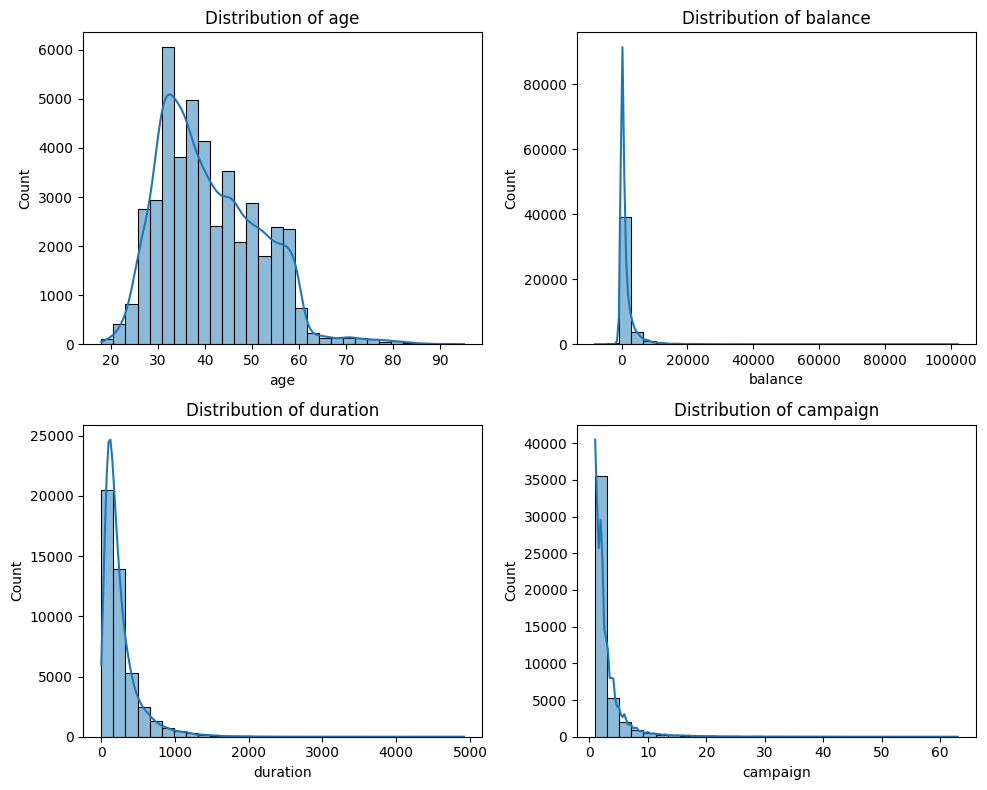

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['age', 'balance', 'duration', 'campaign']

plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(bank_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

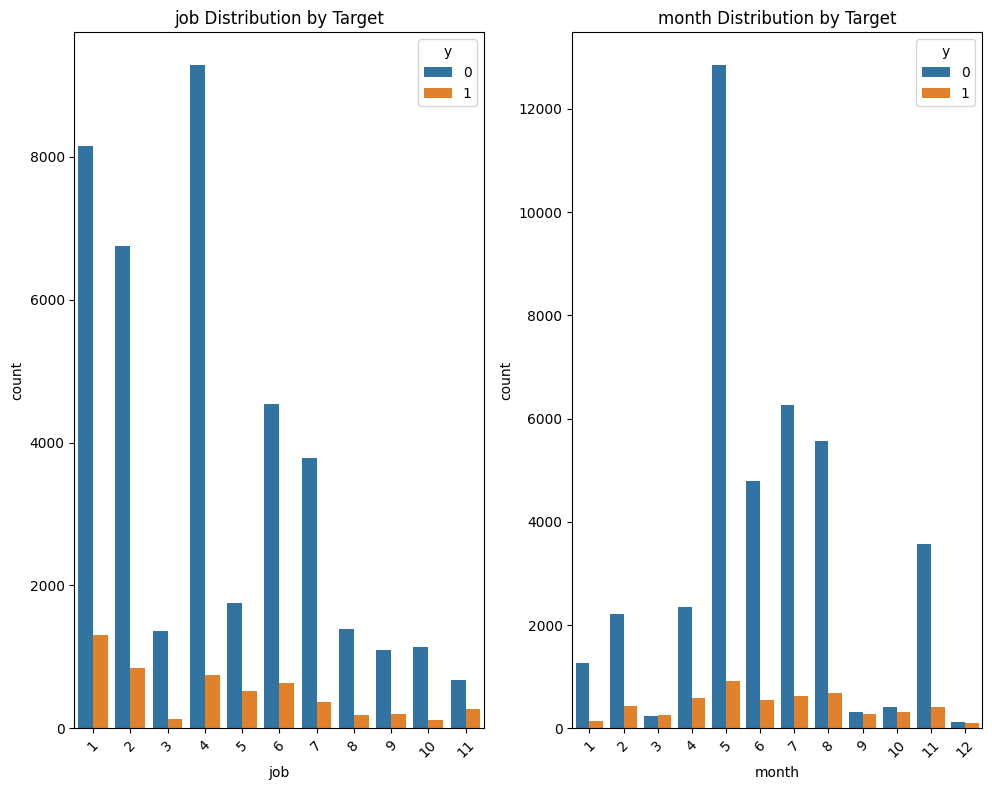

In [16]:
categorical_columns = ['job', 'month']

plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, hue='y', data=bank_data)
    plt.title(f'{col} Distribution by Target')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

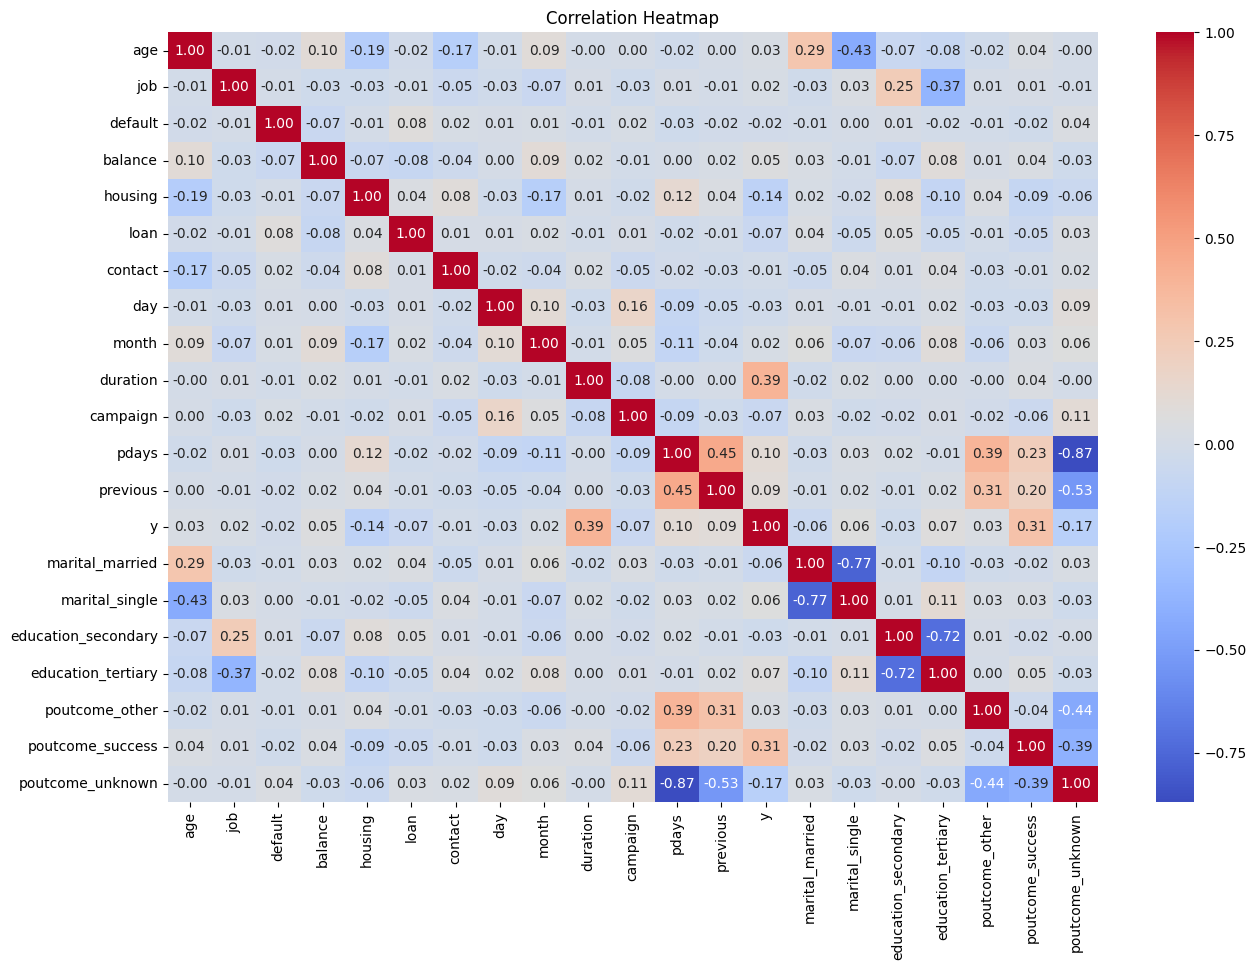

In [17]:
corr_matrix = bank_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

svm = SVC(kernel='rbf')

param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]  # Kernel coefficient
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Best Parameters: {'C': 1, 'gamma': 0.1}
Best Cross-Validation Accuracy: 0.8979484332113575
Test Set Accuracy: 0.9001437576025655

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7985
           1       0.67      0.28      0.40      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



In [19]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    m = len(y)
    return -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    m = X.shape[0]
    
    for i in range(num_iterations):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Iteration {i}, Loss: {loss:.4f}")
    
    return weights, bias

def train_logistic_regression(X_train, y_train, learning_rate=0.01, num_iterations=1000):
    n_features = X_train.shape[1]
    weights = np.zeros(n_features)  # Initialize weights
    bias = 0  # Initialize bias
    
    weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate, num_iterations)
    return weights, bias

def predict(X, weights, bias, threshold=0.5):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    return (probabilities >= threshold).astype(int)

weights, bias = train_logistic_regression(X_train, y_train, learning_rate=0.01, num_iterations=1000)

y_test_pred = predict(X_test, weights, bias)
test_accuracy = np.mean(y_test_pred == y_test)

print(f"Test Set Accuracy: {test_accuracy:.2f}")


Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.5524
Iteration 200, Loss: 0.4674
Iteration 300, Loss: 0.4133
Iteration 400, Loss: 0.3770
Iteration 500, Loss: 0.3517
Iteration 600, Loss: 0.3335
Iteration 700, Loss: 0.3198
Iteration 800, Loss: 0.3095
Iteration 900, Loss: 0.3014
Test Set Accuracy: 0.90


Logistic Regression Test Accuracy: 0.9002543403737697

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7985
           1       0.67      0.29      0.40      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043

SVM Test Accuracy: 0.9001437576025655

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7985
           1       0.67      0.28      0.40      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



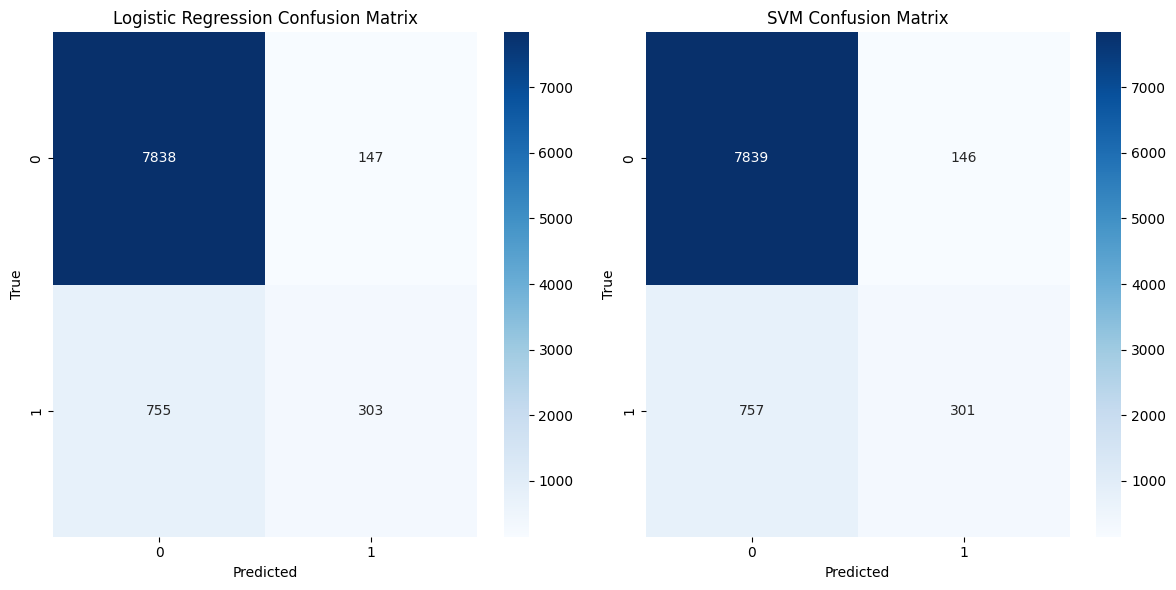

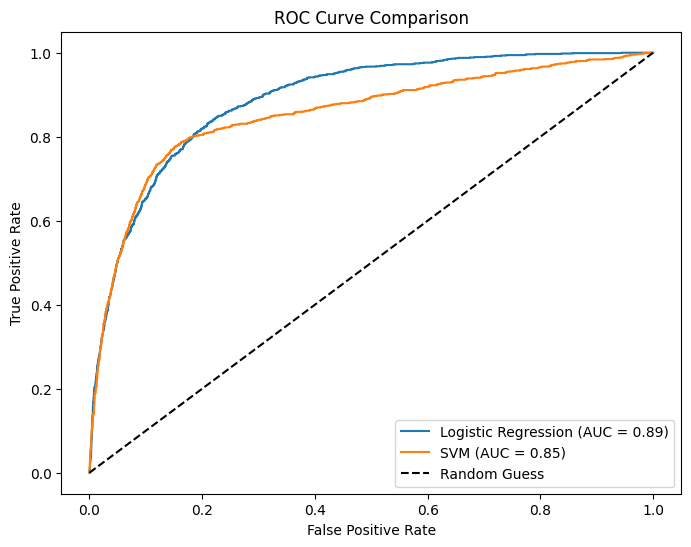

In [20]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

y_test_pred_lr = predict(X_test, weights, bias)
lr_accuracy = accuracy_score(y_test, y_test_pred_lr)
print("Logistic Regression Test Accuracy:", lr_accuracy)
print("\nLogistic Regression Classification Report:\n")
print(classification_report(y_test, y_test_pred_lr))

y_test_pred_svm = best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_test_pred_svm)
print("SVM Test Accuracy:", svm_accuracy)
print("\nSVM Classification Report:\n")
print(classification_report(y_test, y_test_pred_svm))


cm_lr = confusion_matrix(y_test, y_test_pred_lr)
cm_svm = confusion_matrix(y_test, y_test_pred_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

# ROC Curve Comparison
fpr_lr, tpr_lr, _ = roc_curve(y_test, sigmoid(np.dot(X_test, weights) + bias))
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_model.decision_function(X_test))

auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


**Apparantly Logistic Regression performed better**